# ANALISIS CLUSTERING DE CONSUMO ELECTRICO Y DE GAS 

## Importación de datos

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats, integrate
from pydoc import help
from scipy.stats.stats import pearsonr


%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv('C:/Users/Alvaro Santoma/conjunto_solo2016_normalizado_.csv', error_bad_lines=False)
df = df.fillna(0)
df.drop(df.columns[[0]], axis=1, inplace=True)

df2 = pd.read_csv('C:/Users/Alvaro Santoma/Downloads/datos_conjuntos_sin_nulos.csv', error_bad_lines=False)
df2 = df2.fillna(0)
df2.drop(df2.columns[[0]], axis=1, inplace=True)




In [3]:
df2.head()

,ID_SS_ID_SS2,E_MY012015,E_MY022015,E_MY032015,E_MY042015,E_MY052015,E_MY062015,E_MY072015,E_MY082015,E_MY092015,...,G_MY032016,G_MY042016,G_MY052016,G_MY062016,G_MY072016,G_MY082016,G_MY092016,G_MY102016,G_MY112016,G_MY122016
0,700000791500,319.0,281.0,272.0,280.0,240.0,270.0,305.0,370.0,291.0,...,2262.0,2262.0,215.5,215.5,80.0,80.0,101.5,101.5,1790.5,1790.5
1,700000875500,222.0,215.0,188.0,171.0,153.0,109.0,115.0,249.0,251.0,...,0.0,0.0,5.5,5.5,0.0,0.0,10.5,10.5,454.5,454.5
2,700001442600,110.0,70.5,70.5,56.0,56.0,88.5,88.5,115.5,115.5,...,316.0,316.0,233.0,233.0,52.5,52.5,115.5,115.5,271.5,271.5
3,700003135600,0.0,0.0,26.0,72.0,31.0,74.0,41.0,129.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,38.0
4,700003403500,305.0,145.0,145.0,113.5,113.5,106.0,106.0,103.5,103.5,...,657.5,297.5,297.5,264.5,264.5,220.0,220.0,266.5,266.5,266.5


### Análisis exploratorio inicial

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76189 entries, 0 to 76188
Data columns (total 49 columns):
ID_SS_ID_SS2    76189 non-null int64
E_MY012015      76189 non-null float64
E_MY022015      76189 non-null float64
E_MY032015      76189 non-null float64
E_MY042015      76189 non-null float64
E_MY052015      76189 non-null float64
E_MY062015      76189 non-null float64
E_MY072015      76189 non-null float64
E_MY082015      76189 non-null float64
E_MY092015      76189 non-null float64
E_MY102015      76189 non-null float64
E_MY112015      76189 non-null float64
E_MY122015      76189 non-null float64
E_MY012016      76189 non-null float64
E_MY022016      76189 non-null float64
E_MY032016      76189 non-null float64
E_MY042016      76189 non-null float64
E_MY052016      76189 non-null float64
E_MY062016      76189 non-null float64
E_MY072016      76189 non-null float64
E_MY082016      76189 non-null float64
E_MY092016      76189 non-null float64
E_MY102016      76189 non-null floa

In [5]:
df2["G_MY012015"].value_counts()

0.000000e+00    8412
5.500000e+00     228
2.100000e+01     161
1.050000e+01     161
1.100000e+01     157
6.400000e+01     130
3.200000e+01     126
5.300000e+01     126
1.600000e+01     113
2.650000e+01     112
7.400000e+01     110
1.280000e+02      93
9.600000e+01      92
1.170000e+02      78
4.200000e+01      77
1.490000e+02      73
5.350000e+01      72
1.060000e+02      68
9.500000e+01      68
1.600000e+02      67
2.240000e+02      67
5.850000e+01      66
8.500000e+01      65
8.000000e+01      65
1.120000e+02      63
4.250000e+01      61
5.800000e+01      60
6.950000e+01      58
2.150000e+01      57
1.690000e+02      57
                ... 
4.673000e+03       1
9.950000e+02       1
7.000017e+11       1
9.473000e+03       1
8.800000e+00       1
4.468750e+01       1
5.295652e+01       1
9.773333e+02       1
4.256667e+02       1
3.783333e+01       1
7.583333e+01       1
1.250000e+00       1
8.101000e+03       1
2.964000e+04       1
1.243636e+02       1
7.003000e+03       1
2.756500e+03 

In [6]:
df2["E_MY012015"].value_counts()

0.000000e+00    4164
1.000000e+00     405
2.000000e+00     214
1.560000e+02     207
1.890000e+02     193
1.860000e+02     193
2.210000e+02     191
2.070000e+02     190
1.460000e+02     189
1.700000e+02     188
1.950000e+02     188
2.490000e+02     187
1.820000e+02     185
1.650000e+02     183
1.580000e+02     183
1.420000e+02     183
1.390000e+02     182
1.550000e+02     182
2.290000e+02     181
1.470000e+02     181
8.400000e+01     181
2.100000e+02     180
1.320000e+02     180
3.000000e+00     178
1.140000e+02     178
1.870000e+02     178
1.720000e+02     178
2.380000e+02     177
2.030000e+02     177
1.260000e+02     176
                ... 
7.000016e+11       1
7.000007e+11       1
7.000038e+11       1
7.000021e+11       1
6.045000e+02       1
7.000014e+11       1
7.000007e+11       1
7.000038e+11       1
2.208333e+00       1
7.000026e+11       1
7.000032e+11       1
7.000022e+11       1
7.000015e+11       1
1.572727e+01       1
7.000010e+11       1
7.142857e-01       1
1.671429e+01 

In [7]:
df2["G_MY012015"].describe()

count    7.618900e+04
mean     1.713509e+09
std      3.464078e+10
min      0.000000e+00
25%      2.220000e+02
50%      1.284000e+03
75%      2.469000e+03
max      7.500000e+11
Name: G_MY012015, dtype: float64

In [8]:
df2["E_MY012015"].describe()

count    7.618900e+04
mean     2.151432e+10
std      1.208665e+11
min      0.000000e+00
25%      1.140000e+02
50%      2.270000e+02
75%      3.810000e+02
max      7.500000e+11
Name: E_MY012015, dtype: float64

In [9]:
df2.describe()

,ID_SS_ID_SS2,E_MY012015,E_MY022015,E_MY032015,E_MY042015,E_MY052015,E_MY062015,E_MY072015,E_MY082015,E_MY092015,...,G_MY032016,G_MY042016,G_MY052016,G_MY062016,G_MY072016,G_MY082016,G_MY092016,G_MY102016,G_MY112016,G_MY122016
count,7.618900e+04,7.618900e+04,7.618900e+04,7.618900e+04,7.618900e+04,7.618900e+04,7.618900e+04,7.618900e+04,7.618900e+04,7.618900e+04,...,7.618900e+04,7.618900e+04,7.618900e+04,7.618900e+04,7.618900e+04,7.618900e+04,7.618900e+04,7.618900e+04,7.618900e+04,7.618900e+04
mean,7.001076e+11,2.151432e+10,2.151432e+10,2.151432e+10,2.151432e+10,2.151432e+10,2.151432e+10,2.151432e+10,2.151432e+10,2.151432e+10,...,1.713508e+09,1.713508e+09,1.713508e+09,1.713507e+09,1.713507e+09,1.713507e+09,1.713507e+09,1.713507e+09,1.713508e+09,1.713508e+09
std,2.295955e+09,1.208665e+11,1.208665e+11,1.208665e+11,1.208665e+11,1.208665e+11,1.208665e+11,1.208665e+11,1.208665e+11,1.208665e+11,...,3.464078e+10,3.464078e+10,3.464078e+10,3.464078e+10,3.464078e+10,3.464078e+10,3.464078e+10,3.464078e+10,3.464078e+10,3.464078e+10
min,7.000000e+11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.000009e+11,1.140000e+02,9.600000e+01,8.900000e+01,8.700000e+01,8.000000e+01,8.050000e+01,8.600000e+01,9.350000e+01,8.250000e+01,...,1.915000e+02,1.530000e+02,7.312500e+01,4.300000e+01,1.550000e+01,1.050000e+01,1.600000e+01,2.650000e+01,8.950000e+01,9.450000e+01
50%,7.000018e+11,2.270000e+02,1.880000e+02,1.710000e+02,1.680000e+02,1.500000e+02,1.460000e+02,1.600000e+02,1.820000e+02,1.530000e+02,...,8.410000e+02,5.933333e+02,2.205000e+02,1.480000e+02,5.100000e+01,3.900000e+01,5.300000e+01,8.400000e+01,3.415000e+02,3.570000e+02
75%,7.000031e+11,3.810000e+02,2.920000e+02,2.610000e+02,2.580000e+02,2.320000e+02,2.270000e+02,2.615000e+02,3.180000e+02,2.520000e+02,...,1.569500e+03,1.295000e+03,4.745000e+02,3.135000e+02,1.120000e+02,8.500000e+01,1.145000e+02,1.960000e+02,8.460000e+02,8.715000e+02
max,7.500000e+11,7.500000e+11,7.500000e+11,7.500000e+11,7.500000e+11,7.500000e+11,7.500000e+11,7.500000e+11,7.500000e+11,7.500000e+11,...,7.500000e+11,7.500000e+11,7.500000e+11,7.500000e+11,7.500000e+11,7.500000e+11,7.500000e+11,7.500000e+11,7.500000e+11,7.500000e+11


In [4]:
df2['Suma_elec'] = df2.iloc[:,1:25].sum(axis=1)
df2['Suma_gas'] = df2.iloc[:,25:49].sum(axis=1)
df2 = df2.loc[df2['Suma_gas'] <100000]
df2_filtro = df2.loc[df2['Suma_elec']<100000]

In [12]:
df2.loc[df2['Suma_gas'] <100000000].shape

(76003, 51)

In [14]:
df2.loc[df2['Suma_elec']<100000000].shape

(73849, 51)

In [6]:
#se filtran 2574 valores
df2_filtro.shape

(73615, 51)

In [65]:
df2_filtro.describe()

,ID_SS_ID_SS2,E_MY012015,E_MY022015,E_MY032015,E_MY042015,E_MY052015,E_MY062015,E_MY072015,E_MY082015,E_MY092015,...,G_MY052016,G_MY062016,G_MY072016,G_MY082016,G_MY092016,G_MY102016,G_MY112016,G_MY122016,Suma_elec,Suma_gas
count,7.361500e+04,73615.000000,73615.000000,73615.000000,73615.000000,73615.000000,73615.000000,73615.000000,73615.000000,73615.000000,...,73615.000000,73615.000000,73615.000000,73615.000000,73615.000000,73615.000000,73615.000000,73615.000000,73615.000000,73615.000000
mean,7.000957e+11,271.026440,209.379118,188.707150,181.748434,166.391891,161.231029,187.987362,221.150782,179.470267,...,365.375661,229.308341,90.544242,71.594760,91.650750,166.071878,554.531779,581.536253,4543.523056,12405.856159
std,2.162743e+09,273.947731,195.808168,178.354831,162.537554,158.349754,137.358915,174.093634,210.594403,171.005093,...,498.075809,313.807101,177.306242,179.806577,252.624222,311.986082,631.489042,686.722693,3230.901017,10431.312701
min,7.000000e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000009e+11,110.000000,92.416667,86.000000,84.000000,78.000000,78.000000,84.000000,91.000000,80.000000,...,71.666667,43.000000,15.500000,10.500000,16.000000,26.500000,89.000000,94.500000,2435.500000,4176.000000
50%,7.000018e+11,220.000000,183.000000,166.000000,163.000000,146.000000,142.000000,155.000000,176.000000,148.000000,...,219.500000,147.000000,49.000000,37.500000,52.500000,83.666667,340.000000,354.000000,4079.000000,10661.000000
75%,7.000031e+11,360.000000,278.500000,250.000000,247.000000,222.000000,217.000000,249.000000,300.000000,240.000000,...,466.500000,310.333333,110.500000,84.500000,111.500000,194.000000,834.000000,857.000000,6030.000000,18050.000000
max,7.500000e+11,16074.000000,7870.000000,5798.000000,9702.000000,9702.000000,4393.000000,4799.000000,13773.000000,13773.000000,...,20217.000000,20217.000000,16401.500000,16401.500000,40604.000000,40604.000000,23453.000000,23453.000000,98735.000000,99614.000000


#### Data Visualization

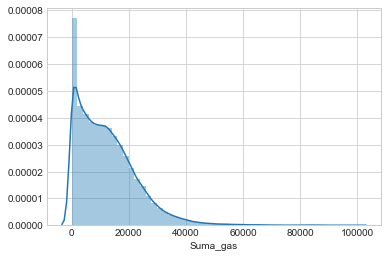

In [7]:
sns.distplot(df2_filtro['Suma_gas'])

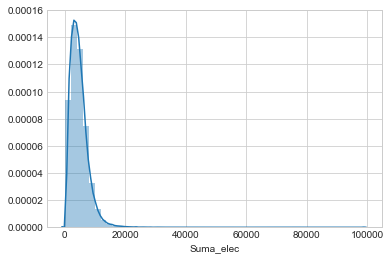

In [34]:
sns.distplot(df2_filtro['Suma_elec'])

#### Bivariate plotting

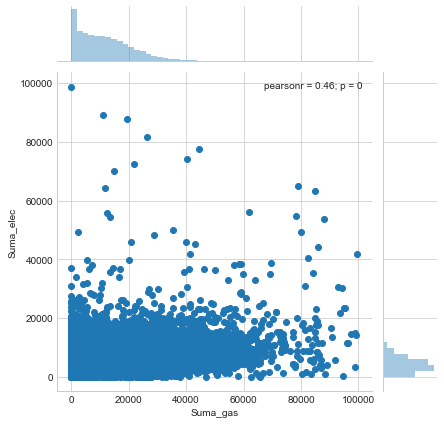

In [8]:
sns.jointplot(df2_filtro['Suma_gas'], df2_filtro['Suma_elec'])

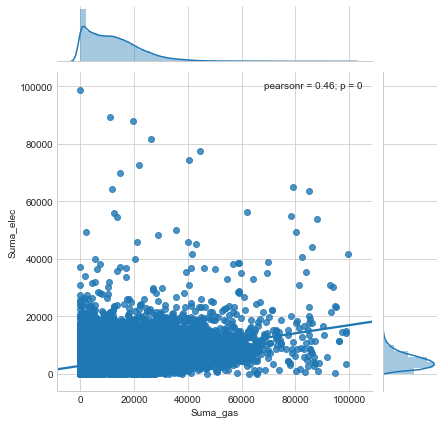

In [32]:
sns.jointplot(df2_filtro['Suma_gas'], df2_filtro['Suma_elec'], kind='reg')

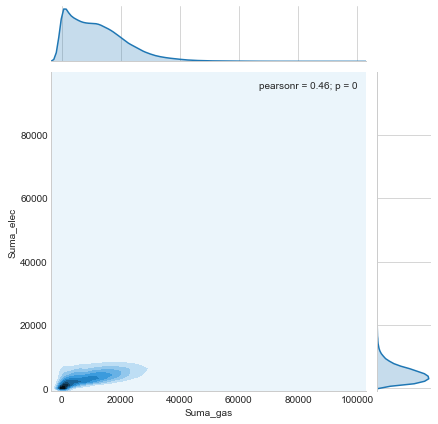

In [33]:
sns.jointplot(df2_filtro['Suma_gas'], df2_filtro['Suma_elec'], kind='kde', shade=True)

In [14]:
df2_filtro.columns

Index(['ID_SS_ID_SS2', 'E_MY012015', 'E_MY022015', 'E_MY032015', 'E_MY042015',
       'E_MY052015', 'E_MY062015', 'E_MY072015', 'E_MY082015', 'E_MY092015',
       'E_MY102015', 'E_MY112015', 'E_MY122015', 'E_MY012016', 'E_MY022016',
       'E_MY032016', 'E_MY042016', 'E_MY052016', 'E_MY062016', 'E_MY072016',
       'E_MY082016', 'E_MY092016', 'E_MY102016', 'E_MY112016', 'E_MY122016',
       'G_MY012015', 'G_MY022015', 'G_MY032015', 'G_MY042015', 'G_MY052015',
       'G_MY062015', 'G_MY072015', 'G_MY082015', 'G_MY092015', 'G_MY102015',
       'G_MY112015', 'G_MY122015', 'G_MY012016', 'G_MY022016', 'G_MY032016',
       'G_MY042016', 'G_MY052016', 'G_MY062016', 'G_MY072016', 'G_MY082016',
       'G_MY092016', 'G_MY102016', 'G_MY112016', 'G_MY122016', 'Suma_elec',
       'Suma_gas'],
      dtype='object')

In [16]:
pearsonr(df2_filtro['Suma_gas'], df2_filtro['Suma_elec'])

(0.4560778747824925, 0.0)

In [10]:
df2_filtro.corr()

,ID_SS_ID_SS2,E_MY012015,E_MY022015,E_MY032015,E_MY042015,E_MY052015,E_MY062015,E_MY072015,E_MY082015,E_MY092015,...,G_MY052016,G_MY062016,G_MY072016,G_MY082016,G_MY092016,G_MY102016,G_MY112016,G_MY122016,Suma_elec,Suma_gas
ID_SS_ID_SS2,1.000000,-0.040387,-0.042695,-0.041904,-0.043499,-0.038385,-0.043360,-0.039339,-0.037317,-0.034501,...,-0.006880,-0.004849,-0.004967,0.001417,0.003835,-0.004320,0.011431,0.008963,-0.027560,-0.018744
E_MY012015,-0.040387,1.000000,0.682675,0.676794,0.593190,0.535363,0.529084,0.483012,0.439713,0.471007,...,0.188386,0.189832,0.139784,0.112558,0.097644,0.111578,0.166641,0.175325,0.701606,0.293863
E_MY022015,-0.042695,0.682675,1.000000,0.795797,0.709543,0.573354,0.596685,0.566477,0.526981,0.495132,...,0.191023,0.181641,0.137504,0.119834,0.112565,0.140228,0.208888,0.198880,0.775986,0.314247
E_MY032015,-0.041904,0.676794,0.795797,1.000000,0.694827,0.607293,0.596707,0.559036,0.510000,0.511018,...,0.199095,0.189872,0.133596,0.107855,0.107174,0.148917,0.200422,0.197660,0.765428,0.323154
E_MY042015,-0.043499,0.593190,0.709543,0.694827,1.000000,0.718921,0.639651,0.579969,0.580994,0.551374,...,0.223400,0.214740,0.155658,0.130433,0.129072,0.173445,0.241701,0.229288,0.795247,0.376598
E_MY052015,-0.038385,0.535363,0.573354,0.607293,0.718921,1.000000,0.638164,0.575422,0.547762,0.554108,...,0.224606,0.205924,0.154833,0.123818,0.115123,0.157154,0.223574,0.219934,0.744271,0.361572
E_MY062015,-0.043360,0.529084,0.596685,0.596707,0.639651,0.638164,1.000000,0.766485,0.651175,0.637966,...,0.227484,0.234517,0.161039,0.134864,0.122456,0.162921,0.260535,0.254288,0.791171,0.390250
E_MY072015,-0.039339,0.483012,0.566477,0.559036,0.579969,0.575422,0.766485,1.000000,0.706593,0.653143,...,0.222221,0.219900,0.157736,0.126151,0.115651,0.168723,0.255456,0.247309,0.773023,0.378265
E_MY082015,-0.037317,0.439713,0.526981,0.510000,0.580994,0.547762,0.651175,0.706593,1.000000,0.820711,...,0.227563,0.204447,0.145193,0.119357,0.111280,0.169559,0.251681,0.246831,0.771551,0.376632
E_MY092015,-0.034501,0.471007,0.495132,0.511018,0.551374,0.554108,0.637966,0.653143,0.820711,1.000000,...,0.211679,0.198544,0.142284,0.120025,0.107541,0.153371,0.230708,0.234855,0.764347,0.355313


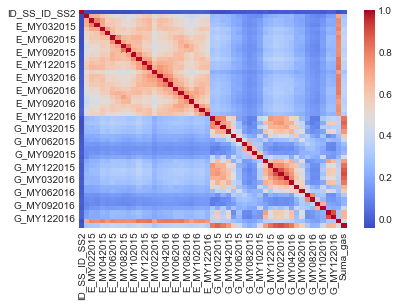

In [9]:
sns.heatmap(df2_filtro.corr(), cmap='coolwarm')

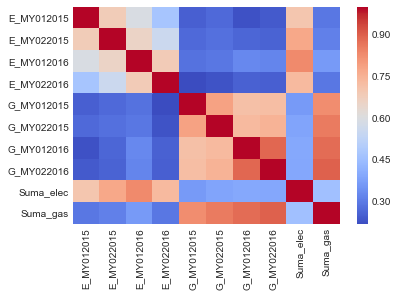

In [24]:
sns.heatmap(df2_filtro.iloc[:,np.r_[1:3,13:15,25:27,37:39,49:51]].corr(), cmap='coolwarm')

In [ ]:
sns.pairplot(df2_filtro)

### Histograma de consumo anual de gas y electrico

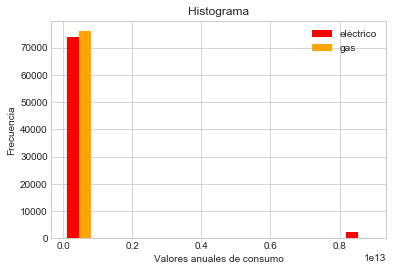

In [3]:
consumo_anual_elec =df2.iloc[:,1:13].sum(axis=1)
consumo_anual_gas =df2.iloc[:,25:37].sum(axis=1)

plt.hist([consumo_anual_elec, consumo_anual_gas],color=['red','orange'], label =['eléctrico','gas'])
plt.legend(prop={'size':10})
plt.title("Histograma")
plt.xlabel("Valores anuales de consumo")
plt.ylabel("Frecuencia")
plt.show()

#### Filtramos valores anómalos...

In [ ]:
## aplico nuevos filtros para que sea coherente con estudio inicial

df=pd.read_csv('C:/Users/Alvaro Santoma/conjunto_solo2016_normalizado_.csv', error_bad_lines=False)
df = df.fillna(0)
df.drop(df.columns[[0]], axis=1, inplace=True)

df2 = pd.read_csv('C:/Users/Alvaro Santoma/Downloads/datos_conjuntos_sin_nulos.csv', error_bad_lines=False)
df2 = df2.fillna(0)
df2.drop(df2.columns[[0]], axis=1, inplace=True)
df2['Suma_elec'] = df2.iloc[:,1:25].sum(axis=1)
df2['Suma_gas'] = df2.iloc[:,25:49].sum(axis=1)

consumo_anual_elec =df2.iloc[:,1:25].sum(axis=1)
consumo_anual_gas =df2.iloc[:,25:49].sum(axis=1)

In [ ]:

elidx0 = [i for i in range(len(df2)) if consumo_anual_elec[i] > 100000]
gasidx0 = [i for i in range(len(df2)) if consumo_anual_gas[i] > 100000]
indices_para_filtrar = list(set(elidx0 + gasidx0))
indices_para_filtrar.sort() # hay 2340 para filtrar
df2 =df2.drop(df2.index[indices_para_filtrar])
df2.reset_index(drop=True, inplace=True)


df = df.drop(df.index[indices_para_filtrar])
df.reset_index(drop=True, inplace=True)
df2.to_csv('consumo_procesado_inicial.csv')

In [ ]:
# Se han filtrado 
df.shape, df2.shape

### Calculo de los valores medios mensuales eléctricos con desviacion estandar del año 2016


No handles with labels found to put in legend.


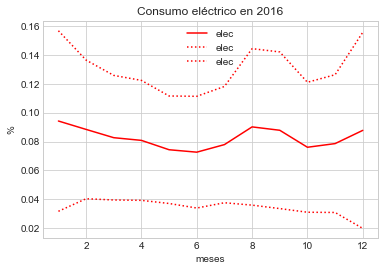

In [46]:
#Calculo de los valores medios mensuales de gas con desviacion estandar del año 2016
elec_df = df.iloc[:,1:13]
elec_mean = elec_df.mean()
elec_std = elec_df.std()

fig = plt.figure()
ax = plt.axes()
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.set(title='Consumo eléctrico en 2016', xlabel='meses',
       ylabel='%')

plt.plot(list(range(1,13)), elec_mean, label='elec', color='red')
plt.plot(list(range(1,13)), elec_mean + elec_std, label='elec', color='red', linestyle =':')
plt.plot(list(range(1,13)), elec_mean - elec_std, label='elec', color='red', linestyle =':')
plt.legend()

### Calculo de los valores medios mensuales de gas con desviacion estandar del año 2016


No handles with labels found to put in legend.


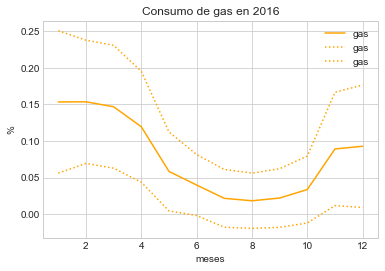

In [47]:
#Calculo de los valores medios mensuales de gas con desviacion estandar del año 2016
gas_df = df.iloc[:,13:25]
gas_mean = gas_df.mean()
gas_std = gas_df.std()

fig = plt.figure()
ax = plt.axes()
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.set(title='Consumo de gas en 2016', xlabel='meses',
       ylabel='%')
plt.plot(list(range(1,13)), gas_mean, label='gas', color='orange')
plt.plot(list(range(1,13)), gas_mean + gas_std, label='gas', color='orange', linestyle =':')
plt.plot(list(range(1,13)), gas_mean - gas_std, label='gas', color='orange', linestyle =':')
plt.legend()

## Clustering consumos electricos

### Determinación del numero de clusters óptimo

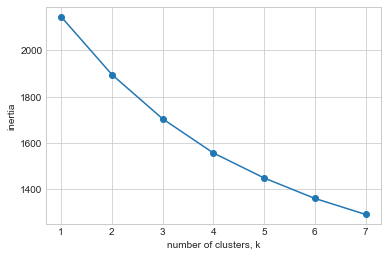

In [48]:
ks = range(1, 8)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(elec_df)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
        
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show() 

In [49]:
numero_de_clusters = 4
model = KMeans(n_clusters=numero_de_clusters, random_state=40310)
model.fit(elec_df)
labels=model.predict(elec_df)

#saco los indices de cada grupo
eidx0 = [i for i in range(len(labels)) if labels[i] == 0]
eidx1 = [i for i in range(len(labels)) if labels[i] == 1]
eidx2 = [i for i in range(len(labels)) if labels[i] == 2] 
eidx3 = [i for i in range(len(labels)) if labels[i] == 3]
print (len(eidx0), len(eidx1),len(eidx2),len(eidx3))

51121 20261 852 1381


### Descripcion gráfica de los grupos de electricidad

#### Exploracion individual de cada uno de los clusters

In [102]:

def plot_multiples(df, lista_indices):
# axes are in a two-dimensional array, indexed by [row, col]
    fig, ax = plt.subplots(2, 3, sharex='col', sharey='col')
    i =0
    plt.suptitle('Muestras aleatorias de curvas eléctricas normalizadas en 2016\n en un cluster que representa el {}%'.format(round(len(lista_indices)/df.shape[0]*100,1)))
    while i<6:
        plt.subplot(321+i)
        plt.plot(list(range(1,13)),df.iloc[lista_indices[i],13:25], color ='red')
        plt.ylim((0, 0.25))
        plt.xlim((0,13))
        i += 1

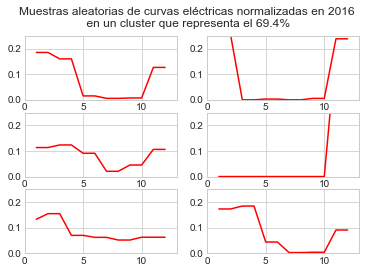

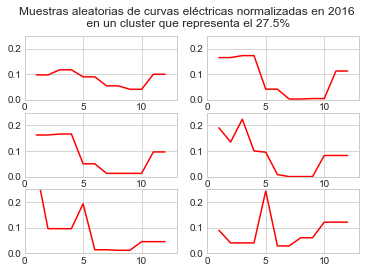

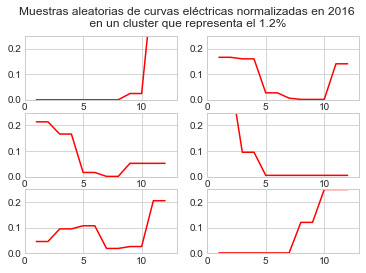

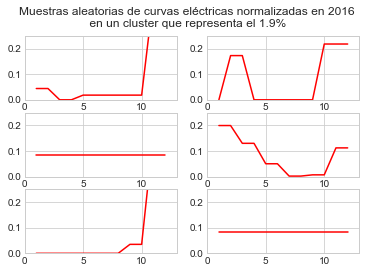

In [103]:
plot_multiples(df, eidx0)
plot_multiples(df, eidx1)
plot_multiples(df, eidx2)
plot_multiples(df, eidx3)

In [50]:
def anual_percentil_elec(df, lista_indices):
    
    df2 = df.iloc[lista_indices,:]
    df_mean = df2.iloc[:,1:13].mean()

    l_25 = list(df2.iloc[:,1:13].quantile(q=0.025, axis=0))
    l_75 = list(df2.iloc[:,1:13].quantile(q=0.975, axis=0))

    fig = plt.figure()
    ax = plt.axes()
    ax.set(title='Media del consumo eléctrico normalizado en 2016\n en un cluster que representa el {}%'.format(round(len(lista_indices)/df.shape[0]*100,1)), xlabel='meses')
    plt.plot(list(range(1,13)), df_mean, label='elec 2016', color ='red')
    plt.plot(list(range(1,13)), l_25, label='percentil 2.5', color='red',linestyle =':')
    plt.plot(list(range(1,13)), l_75, label='percentil 97.5', color ='red',linestyle =':')
    plt.legend()
    plt.ylim(0, 0.4)

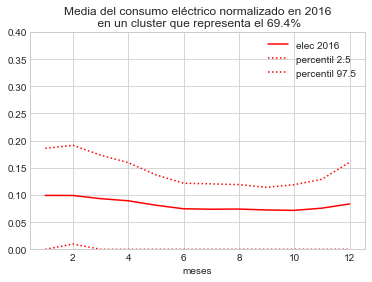

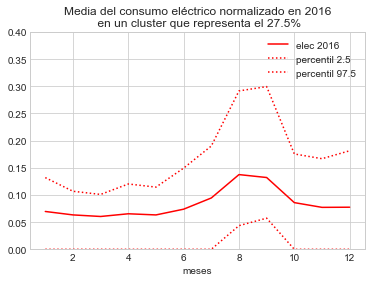

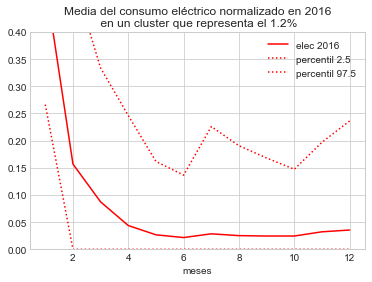

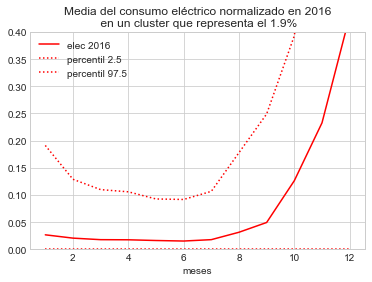

In [51]:
anual_percentil_elec(df,eidx0)
anual_percentil_elec(df,eidx1)
anual_percentil_elec(df,eidx2)
anual_percentil_elec(df,eidx3)

Difinición de etiquetas para cada cluster

In [54]:
clasificacion_elec = ['constante','punta_verano','punta_invierno', 'punta_invierno' ]

## Clustering consumos de gas

### Determinación del numero de clusters óptimo

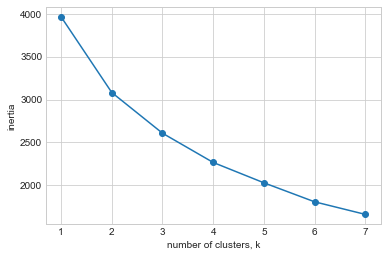

In [15]:
ks = range(1, 8)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(gas_df)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show() 

No se aprecia un codo que facilite la decisión.

In [85]:
numero_de_clusters = 3
model = KMeans(n_clusters=numero_de_clusters, random_state=1)
model.fit(gas_df)
labels=model.predict(gas_df)

#saco los indices de cada grupo
gidx0 = [i for i in range(len(labels)) if labels[i] == 0]
gidx1 = [i for i in range(len(labels)) if labels[i] == 1]
gidx2 = [i for i in range(len(labels)) if labels[i] == 2] 
gidx3 = [i for i in range(len(labels)) if labels[i] == 3]
print (len(gidx0), len(gidx1),len(gidx2),len(gidx3))

54711 3388 15516 0


### Descripcion gráfica de los grupos de gas

In [56]:
def anual_percentil_gas(df, lista_indices):
    
    df3 = df.iloc[lista_indices,:]
    df_mean = df3.iloc[:,13:25].mean()

    l_25 = list(df3.iloc[:,13:25].quantile(q=0.025, axis=0))
    l_75 = list(df3.iloc[:,13:25].quantile(q=0.975, axis=0))

    fig = plt.figure()
    ax = plt.axes()
    ax.set(title='Media del consumo de gas normalizado en 2016\n en un cluster que representa el {}%'.format(round(len(lista_indices)/df.shape[0]*100,1)), xlabel='meses')
    plt.plot(list(range(1,13)), df_mean, label='gas 2016', color ='orange')
    plt.plot(list(range(1,13)), l_25, label='percentil 2.5', color='orange',linestyle =':')
    plt.plot(list(range(1,13)), l_75, label='percentil 97.5', color ='orange',linestyle =':')
    plt.legend()
    plt.ylim(0, 0.5)

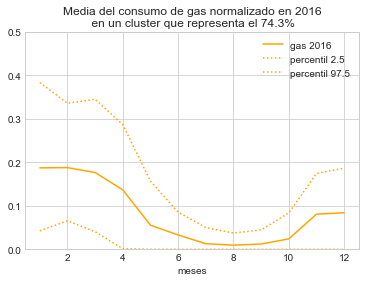

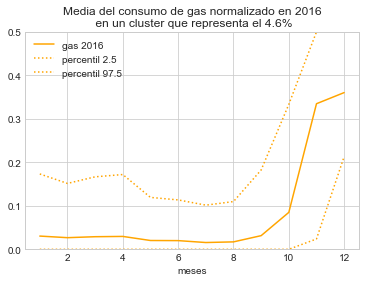

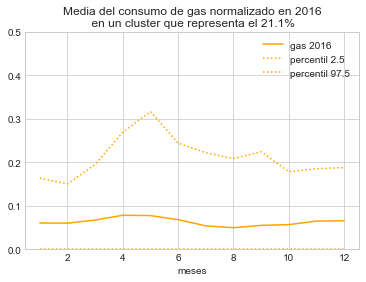

In [86]:
anual_percentil_gas(df,gidx0)
anual_percentil_gas(df,gidx1)
anual_percentil_gas(df,gidx2)
#anual_percentil_gas(df,gidx3)

Difinición de etiquetas para cada cluster

In [87]:
clasificacion_gas = ['punta_invierno','punta_invierno', 'constante']

#df.reset_index(drop=True, inplace=True)
#563 in gidx0

# df.iloc[530:,:]

Incorporación de las etiquetas a nuestro df

In [88]:
clasificacion_gas[0]

df.loc[gidx0,'class_gas'] = clasificacion_gas[0]
df.loc[gidx1,'class_gas'] = clasificacion_gas[1]
df.loc[gidx2,'class_gas'] = clasificacion_gas[2]

df.loc[eidx0,'class_elec'] = clasificacion_elec[0]
df.loc[eidx1,'class_elec'] = clasificacion_elec[1]
df.loc[eidx2,'class_elec'] = clasificacion_elec[2]
df.loc[eidx3,'class_elec'] = clasificacion_elec[3]

In [89]:
df.head(10).iloc[:,-2:]

,class_gas,class_elec
0,punta_invierno,constante
1,punta_invierno,constante
2,constante,constante
3,punta_invierno,constante
4,punta_invierno,constante
5,constante,punta_verano
6,punta_invierno,punta_verano
7,punta_invierno,constante
8,punta_invierno,constante
9,constante,constante


### Tabla de contingencias

Numero de casos

In [90]:
tab = pd.crosstab(df['class_gas'], df['class_elec'], margins = True)
tab

class_elec,constante,punta_invierno,punta_verano,All
class_gas,,,,
constante,9651,873,4992,15516
punta_invierno,41470,1360,15269,58099
All,51121,2233,20261,73615


Porcentaje

In [91]:
round(tab/tab.loc['All','All']*100,0)

class_elec,constante,punta_invierno,punta_verano,All
class_gas,,,,
constante,13.0,1.0,7.0,21.0
punta_invierno,56.0,2.0,21.0,79.0
All,69.0,3.0,28.0,100.0


##### GRUPOS DE USUARIOS:
1. **Gas Constante / Electrico Constante (13%)**: Sin patrones estacionales claros en ninguno de los dos servicios.
2. **Gas Constante / Electrico Punta Invierno (1%)**: Domicilios que está gastando mucho en estufas eléctricas y podrían disponer de calefacción a gas. Campaña Calefacción.
3. **Gas Constante / Electrico Punta Verano (7%)**: Domicilios de veraneo que repuntan actividad electrica en verano  
4. **Gas Invierno / Electrico Constante (56%)**: El caso más habitual. Se intuye calefacción a gas pero no se aprecia aire acondicionado. Campañas Aire Acondicionado.
5. **Gas Invierno / Electrico Punta Invierno (2%)**: Probablemente son fincas con calefacción a gas que refuerzan con estufas. Campañas Aire Acondicionado.
6. **Gas Invierno / Electrico Punta Verano (22%)**: Domicilios con calefacción a gas y aire acondicionado.

### Analisis de cada cluster en términos de consumo absoluto

In [92]:
grupo1 = df.loc[(df['class_gas'] =='constante') & (df['class_elec'] =='constante')].index.tolist()
grupo2 = df.loc[(df['class_gas'] =='constante') & (df['class_elec'] =='punta_invierno')].index.tolist()
grupo3 = df.loc[(df['class_gas'] =='constante') & (df['class_elec'] =='punta_verano')].index.tolist()
grupo4 = df.loc[(df['class_gas'] =='punta_invierno') & (df['class_elec'] =='constante')].index.tolist()
grupo5 = df.loc[(df['class_gas'] =='punta_invierno') & (df['class_elec'] =='punta_invierno')].index.tolist()
grupo6 = df.loc[(df['class_gas'] =='punta_invierno') & (df['class_elec'] =='punta_verano')].index.tolist()
nombre_grupos =['Gas Constante/Eléctrico Constante','Gas Constante / Electrico Punta Invierno', 'Gas Constante / Electrico Punta Verano', 'Gas Invierno / Electrico Constante','Gas Invierno / Electrico Punta Invierno','Gas Invierno / Electrico Punta Verano' ]

Función para graficar cada grupo

In [93]:
# def plot_gas_elec_global(df):

    
def plot_gas_elec_global(df):
    #Calculo de los valores medios mensuales de gas con desviacion estandar del año 2016
    elec_df = df.iloc[:,13:25]
    elec_mean = elec_df.mean()
    elec_17 = list(df.iloc[:,13:25].quantile(q=0.025, axis=0))
    elec_83 = list(df.iloc[:,13:25].quantile(q=0.975, axis=0))
    
    gas_df = df.iloc[:,37:49]  
    gas_mean = gas_df.mean()
    gas_17 = list(df.iloc[:,37:49].quantile(q=0.025, axis=0))
    gas_83 = list(df.iloc[:,37:49].quantile(q=0.975, axis=0))
    

    fig, ax1 = plt.subplots()
    ax1.set(title='Consumos en 2016 Totales medios de gas y eléctrico')
    ax1.plot(list(range(1,13)), elec_mean, label='elec', color='red')
    ax1.plot(list(range(1,13)), elec_17,  color='red', linestyle =':')
    ax1.plot(list(range(1,13)), elec_83,  color='red', linestyle =':')
    ax1.set_xlabel('meses')
    ax1.set_ylabel('kWh', color='red')
    ax1.set_ylim((0,1200))
    ax1.tick_params('y', colors='red')
    
    ax2 = ax1.twinx()
    ax2.plot(list(range(1,13)), gas_mean, label='gas', color='orange')
    ax2.plot(list(range(1,13)), gas_17, label='gas', color='orange', linestyle =':')
    ax2.plot(list(range(1,13)), gas_83, label='gas', color='orange', linestyle =':')
    ax2.set_ylabel('m3', color='orange')
    ax2.set_ylim((0,3500))
    ax2.tick_params('y', colors='orange')
    fig.tight_layout()
    plt.show()    
    

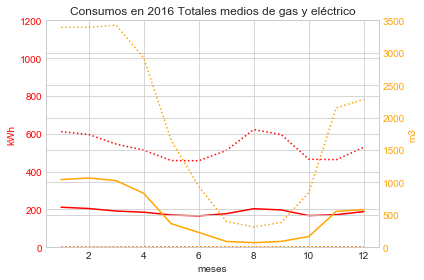

In [94]:
plot_gas_elec_global(df2)

In [65]:
def filtro_altos(df, group):
    q_99 =df.iloc[group,37:49].quantile(0.995).sum()
    indices = [i for i in group if df2.iloc[i,37:49].sum() > q_99]
    group = [i for j, i in enumerate(group) if i not in indices]

    plot_personalizado1(df,group)
    
def plot_personalizado1(df,group):
    #Calculo de los valores medios mensuales de gas con desviacion estandar del año 2016
    elec_df = df.iloc[group,13:25]
    elec_mean = elec_df.mean()
    elec_17 = list(df.iloc[group,13:25].quantile(q=0.025, axis=0))
    elec_83 = list(df.iloc[group,13:25].quantile(q=0.975, axis=0))
    
    gas_df = df.iloc[group,37:49]  
    gas_mean = gas_df.mean()
    gas_17 = list(df.iloc[group,37:49].quantile(q=0.025, axis=0))
    gas_83 = list(df.iloc[group,37:49].quantile(q=0.975, axis=0))
    

    fig, ax1 = plt.subplots()
    ax1.set(title='Consumos en 2016 para el grupo Gas Invierno/Eléctrico Punta Verano\n que representa el {}% de los datos'.format(round(len(group)/df.shape[0]*100)))
    ax1.plot(list(range(1,13)), elec_mean, label='elec', color='red')
    ax1.plot(list(range(1,13)), elec_17,  color='red', linestyle =':')
    ax1.plot(list(range(1,13)), elec_83,  color='red', linestyle =':')
    ax1.set_xlabel('meses')
    ax1.set_ylabel('kWh', color='red')
    ax1.set_ylim((0,1200))
    ax1.tick_params('y', colors='red')
    
    ax2 = ax1.twinx()
    ax2.plot(list(range(1,13)), gas_mean, label='gas', color='orange')
    ax2.plot(list(range(1,13)), gas_17, label='gas', color='orange', linestyle =':')
    ax2.plot(list(range(1,13)), gas_83, label='gas', color='orange', linestyle =':')
    ax2.set_ylabel('m3', color='orange')
    ax2.set_ylim((0,3500))
    ax2.tick_params('y', colors='orange')
    fig.tight_layout()
    plt.show()
    

### Sin patrones claros

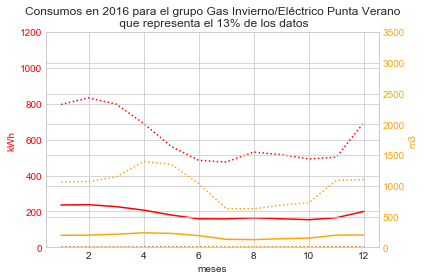

In [104]:
filtro_altos(df2, grupo1)

### Campaña calefacción

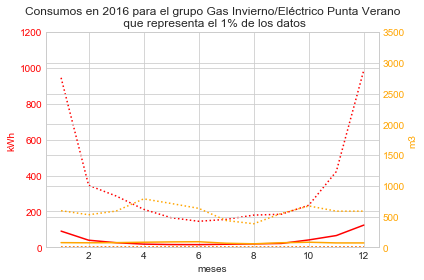

In [105]:
# Campaña calefaccion
filtro_altos(df2, grupo2)

### Casas de Veraneo

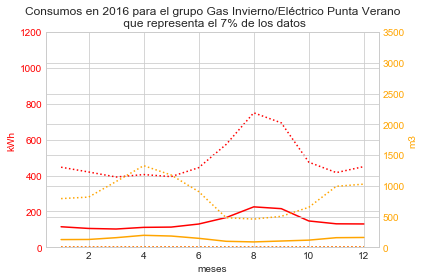

In [106]:
# Veraneo
filtro_altos(df2, grupo3)

### Campañas aire acondicionado

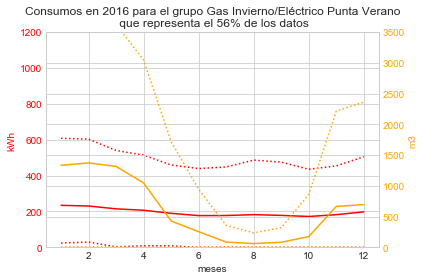

In [98]:
filtro_altos(df2,grupo4)

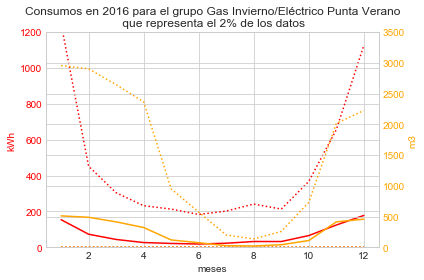

In [107]:
filtro_altos(df2, grupo5)

### Fincas con aire acondicionado y calderas

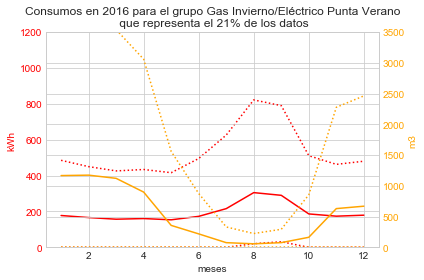

In [108]:
filtro_altos(df2, grupo6)

### Conclusiones hacer campañas para clientes concretos dentro de cada cluster con interes

In [ ]:
### calculo para dashboard

df_cluster = pd.read_csv('C:/Users/Alvaro Santoma/Documents/ASOS aws/Sprint 6/conjunto_reducido_unmillon.csv', error_bad_lines=False)
elec_df = df.iloc[:,1:13]
gas_df = df.iloc[:,13:25]

#electrico
numero_de_clusters = 4
model = KMeans(n_clusters=numero_de_clusters, random_state=40310)
model.fit(elec_df)
labels=model.predict(elec_df)

#saco los indices de cada grupo
eidx0 = [i for i in range(len(labels)) if labels[i] == 0]
eidx1 = [i for i in range(len(labels)) if labels[i] == 1]
eidx2 = [i for i in range(len(labels)) if labels[i] == 2] 
eidx3 = [i for i in range(len(labels)) if labels[i] == 3]
print (len(eidx0), len(eidx1),len(eidx2),len(eidx3))

anual_percentil_elec(df,eidx0)
anual_percentil_elec(df,eidx1)
anual_percentil_elec(df,eidx2)
anual_percentil_elec(df,eidx3)

#gas 

numero_de_clusters = 3
model = KMeans(n_clusters=numero_de_clusters, random_state=1)
model.fit(gas_df)
labels=model.predict(gas_df)

#saco los indices de cada grupo
gidx0 = [i for i in range(len(labels)) if labels[i] == 0]
gidx1 = [i for i in range(len(labels)) if labels[i] == 1]
gidx2 = [i for i in range(len(labels)) if labels[i] == 2] 
gidx3 = [i for i in range(len(labels)) if labels[i] == 3]
print (len(gidx0), len(gidx1),len(gidx2),len(gidx3))

anual_percentil_gas(df,gidx0)
anual_percentil_gas(df,gidx1)
anual_percentil_gas(df,gidx2)

# funcion de electricidad
def anual_percentil_elec(df, lista_indices):
    
    df2 = df.iloc[lista_indices,:]
    df_mean = df2.iloc[:,1:13].mean()

    l_25 = list(df2.iloc[:,1:13].quantile(q=0.025, axis=0))
    l_75 = list(df2.iloc[:,1:13].quantile(q=0.975, axis=0))

    fig = plt.figure()
    ax = plt.axes()
    ax.set(title='Media del consumo eléctrico normalizado en 2016\n en un cluster que representa el {}%'.format(round(len(lista_indices)/df.shape[0]*100,1)), xlabel='meses')
    plt.plot(list(range(1,13)), df_mean, label='elec 2016', color ='red')
    plt.plot(list(range(1,13)), l_25, label='percentil 2.5', color='red',linestyle =':')
    plt.plot(list(range(1,13)), l_75, label='percentil 97.5', color ='red',linestyle =':')
    plt.legend()
    plt.ylim(0, 0.4)

def anual_percentil_gas(df, lista_indices):
    
    df3 = df.iloc[lista_indices,:]
    df_mean = df3.iloc[:,13:25].mean()

    l_25 = list(df3.iloc[:,13:25].quantile(q=0.025, axis=0))
    l_75 = list(df3.iloc[:,13:25].quantile(q=0.975, axis=0))

    fig = plt.figure()
    ax = plt.axes()
    ax.set(title='Media del consumo de gas normalizado en 2016\n en un cluster que representa el {}%'.format(round(len(lista_indices)/df.shape[0]*100,1)), xlabel='meses')
    plt.plot(list(range(1,13)), df_mean, label='gas 2016', color ='orange')
    plt.plot(list(range(1,13)), l_25, label='percentil 2.5', color='orange',linestyle =':')
    plt.plot(list(range(1,13)), l_75, label='percentil 97.5', color ='orange',linestyle =':')
    plt.legend()
    plt.ylim(0, 0.5)
    

